We hope that in the upramp, the $\alpha_m$ is a constant. From 
$$\alpha_m = -\frac{1}{2}\frac{d\beta_m(z)}{dz}$$
We have:
$$\beta_m(z) = \beta_{m0} - 2\alpha_m z$$
where $\beta_{m0} = \beta_m(0)$. (Similarly, we use $n_0 = n(0)$, $\omega_{p0} = \omega_p(0)$)

We know $\beta_m(z) = \sqrt{2\gamma} \dfrac{c}{\omega_p(z)}$, and we assume the beam is not accelerating in the plasma ramp. So:
$$\frac{n(z)}{n_0} = \frac{\omega_p(z)^2}{\omega_{p0}^2} = \frac{\beta_{m0}^2}{\beta_m(z)^2} = \frac{1}{\left(1 - \dfrac{2\alpha_m z}{\beta_{m0}}\right)^2}$$

Notice that for a upramp, $\alpha_m > 0$. The exit of the upramp (also the entrance of the uniform acceleration region) is at $z = 0$, so we have $z < 0$ in the upramp.

To satisfy the adiabatic condition, we choose $\alpha_m = 0.1$. 

We use $c/\omega_{p0}$ (the skin depth for the uniform acceleration region) to normalize all the length. So $\beta_{m0} = \sqrt{2\gamma}$

We have:

$$\frac{n(z)}{n_0} = \frac{1}{\left(1 - \dfrac{2\alpha_m z}{\sqrt{2\gamma}}\right)^2}$$

If we assume at the entrance of the upramp, $n_{entrance} = n_0 / 100$, we can determine that the entrance is at: $z_{entrance}$ Notice that this length will be longer if we assume the beam has a larger $\gamma$)

The plasma density upramp looks like the following:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

### Set the parameters for the ramp
alpha_m = 0.1
gamma = 48786
n_entrance_over_n0 = 0.01
plateau_length = 30000
downramp = True

The plasma entrance is at z = -14056.432691120459


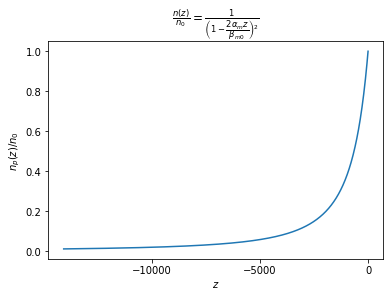

In [3]:
### Generate the ramp and plot
beta_m0 = np.sqrt(2 * gamma)
z_entrance = (1 - np.sqrt(1 / n_entrance_over_n0)) * beta_m0 / 2 / alpha_m
print('The plasma entrance is at z =',z_entrance)
z = np.linspace(z_entrance,0,int(-z_entrance / 10)+1)
n = 1 / (1 - 2 * alpha_m * z / beta_m0) ** 2

plt.plot(z,n)
plt.xlabel('$z$')
plt.ylabel('$n_p(z) / n_0$')
plt.title(r'$\frac{n(z)}{n_0} = \frac{1}{\left(1 - \dfrac{2\alpha_m z}{\beta_{m0}}\right)^2}$')
plt.rcParams.update({'font.size': 16})
plt.show()

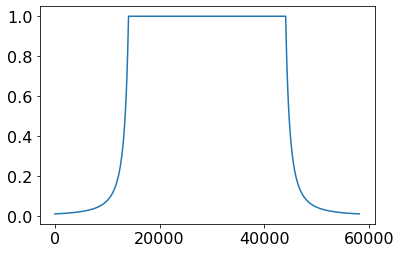

In [4]:
### Shift the entrance to z = 0, then append a uniform acceleration region, or perhaps append a downramp as well
z_input = z - z[0]
n_input = n
if downramp:
    z_input = np.append(z_input,z_input + (z_input[-1] + plateau_length))
    n_input = np.append(n_input,n_input[::-1])
elif plateau_length > 0:
    z_input = np.append(z_input,z_input[-1]+plateau_length)
    n_input = np.append(n,n[-1])
plt.plot(z_input,n_input)
plt.show()

### Set plasma density in input file

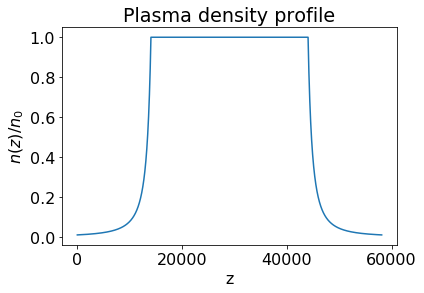

In [5]:
from helper import *
clean_up()
set_plasma_density(z_input,n_input,name = 'species',idx = 0,path = '..')
set_plasma_density(z_input,n_input,name = 'species',idx = 1,path = '..')
_,_ = get_density_profile(name = 'species', idx = 0, plot = True, save=False, path = '..')